## Practice notebook for multivariate analysis using NHANES data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

### Question 1
Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

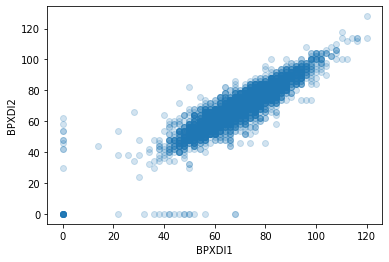

In [3]:
sns.regplot(x = "BPXDI1", y = "BPXDI2", data = da, fit_reg = False,
            scatter_kws = {"alpha":0.2})

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


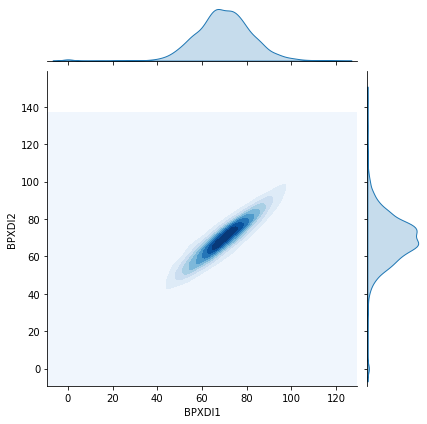

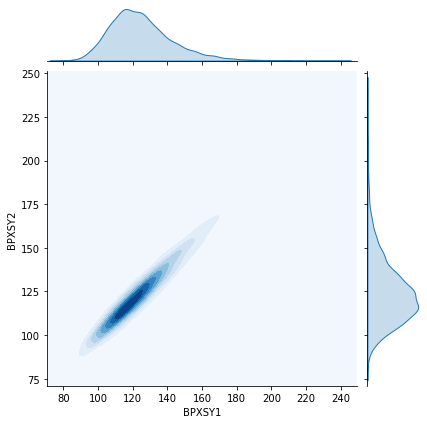

In [4]:
print(da[["BPXDI1", "BPXDI2"]].dropna().corr())
sns.jointplot(x = "BPXDI1", y = "BPXDI2", data = da, kind = 'kde', fill = True, thresh = 0, cmap = 'Blues')
print("")
print(da[["BPXSY1", "BPXSY2"]].dropna().corr())
sns.jointplot(x = "BPXSY1", y = "BPXSY2", data = da, kind = 'kde', fill = True, thresh = 0, cmap = 'Blues')

**Q1a. How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?**

The repeated measurements of diastolic blood pressure are highly correlated with a correlation index of 0.88; comparing with the repeated measurements of systolic blood pressure with a correlation index of 0.96.

**Q2a. Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?**

Both of the second systolic and second diastolic blood pressure measure and the first systolic and first diastolic blood pressure measure are not highly correlated, with correlation indexes 0.30 and 0.31.

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000


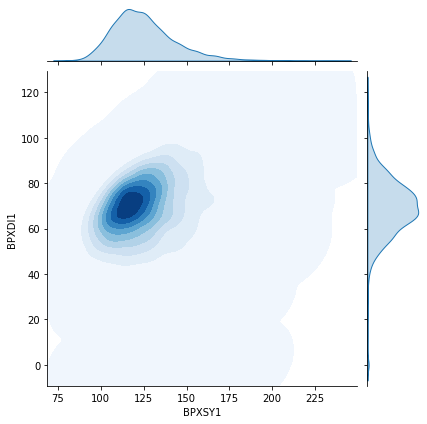

In [5]:
print(da[["BPXSY1", "BPXDI1"]].dropna().corr())
sns.jointplot(x = "BPXSY1", y = "BPXDI1", data = da, fill = True, kind = 'kde', thresh = 0, cmap = 'Blues')

          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


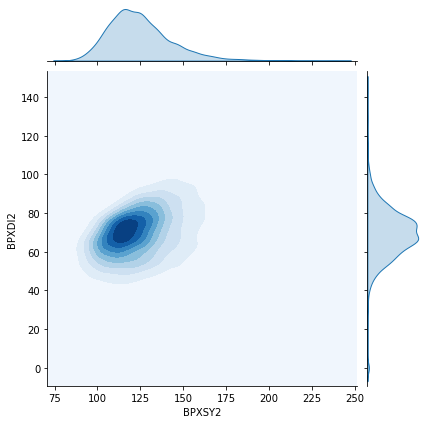

In [7]:
print(da[["BPXSY2", "BPXDI2"]].dropna().corr())
sns.jointplot(x = "BPXSY2", y = "BPXDI2", data = da, thresh = 0, fill = True, kind = 'kde', cmap = 'Blues')

### Question 2
Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

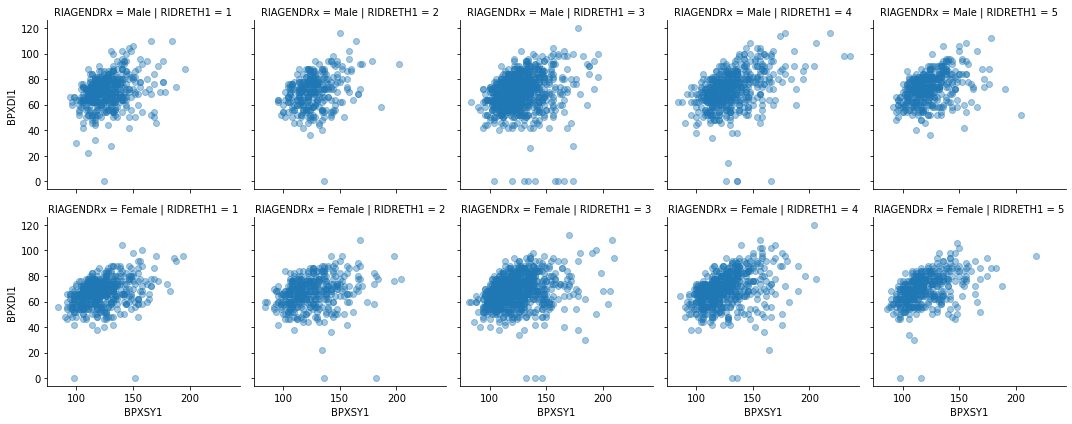

In [8]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})
_ = sns.FacetGrid(da, row = "RIAGENDRx", col = "RIDRETH1").map(plt.scatter, "BPXSY1", "BPXDI1", alpha = 0.4)

### Question 3
Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [9]:
da["DMDEDUC2x"] = da["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMDEDUC2x', ylabel='RIDAGEYR'>

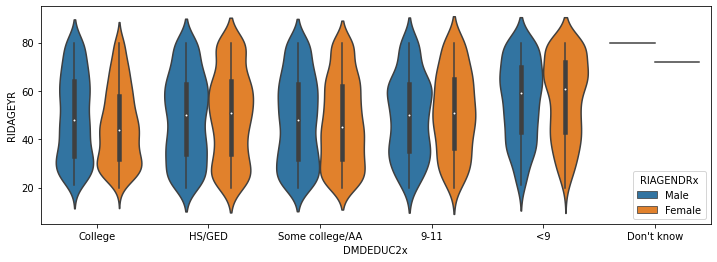

In [10]:
plt.figure(figsize = (12, 4))

# the column input needs to be quantative
sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, da.RIAGENDRx)

### Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

In [11]:
# have a glimps of the age data
da.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agegrp', ylabel='BMXBMI'>

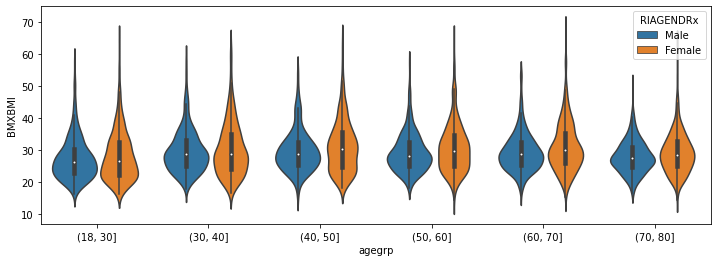

In [12]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

plt.figure(figsize = (12, 4))
sns.violinplot(da.agegrp, da.BMXBMI, da.RIAGENDRx)

### Question 5
Construct a `frequency table` for the joint distribution of ethnicity groups (RIDRETH1) and health-insurance status (HIQ210). Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [15]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})

print(da.HIQ210x.isnull().sum())
print(da["RIDRETH1x"].isnull().sum())

1003
0


In [16]:
da["HIQ210x"].fillna("Missing", inplace = True)

In [18]:
pd.crosstab(da.RIDRETH1x, da.HIQ210x).apply(lambda x: x/x.sum(), axis = 1)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,0.000000,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142
